Note book Configration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook simport pandas as pdettings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

Data Loading

In [5]:
import pandas as pd
file_path = '../data/raw/data.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()  # Include df.info() to get necessary summary stats

Dataset loaded successfully with 95662 rows and 16 columns.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
import pandas as pd
file_path = '../data/raw/data.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()  # Include df.info() to get necessary summary stats

Dataset loaded successfully with 95662 rows and 16 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStr

Data Type Correction and Cleaning

In [6]:
# Convert TransactionStartTime to datetime object
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Convert appropriate columns to categorical type
categorical_cols_to_convert = ['CountryCode', 'PricingStrategy']
for col in categorical_cols_to_convert:
    # Ensure they are read correctly, even if they were int64 initially
    df[col] = df[col].astype(str).astype('category') 

# Drop Value column as it is the absolute value of Amount (redundant for modeling)
df.drop(columns=['Value'], inplace=True)

print("Data types corrected. Sample after correction:")
print(df.dtypes)

Data types corrected. Sample after correction:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                        category
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                    category
FraudResult                           int64
dtype: object


Summary Statistics and Distribution

--- Summary Statistics for Amount ---
count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64


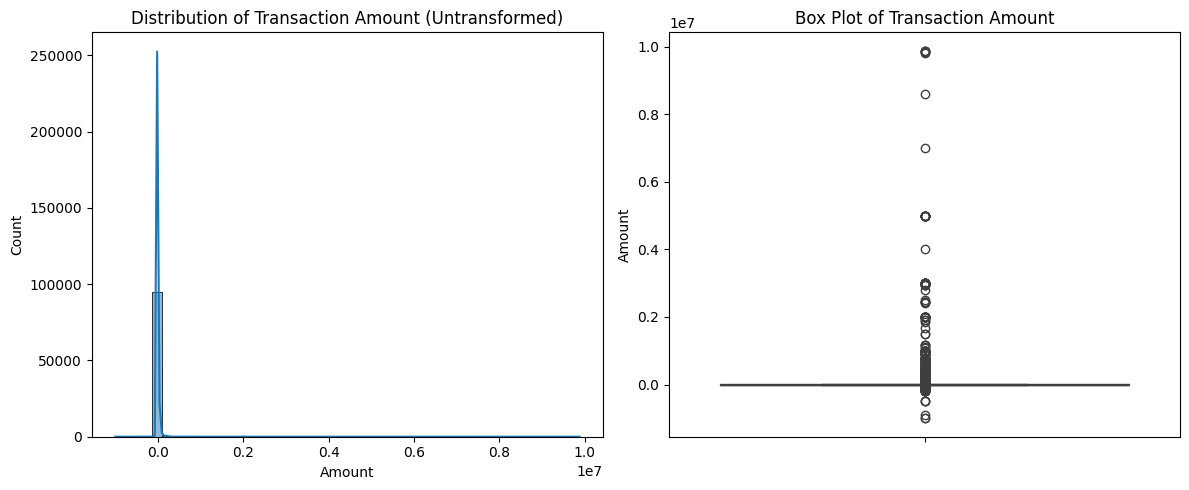

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Numerical Summary and Distribution

# Summary statistics for the 'Amount' feature
print("--- Summary Statistics for Amount ---")
print(df['Amount'].describe())

# Check the distribution of 'Amount' 
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
# Truncate the visual range for better detail if the data is extremely skewed
sns.histplot(df['Amount'], kde=True, bins=50, log_scale=(False, False))
plt.title('Distribution of Transaction Amount (Untransformed)')
plt.xlabel('Amount')

# Box Plot for Outlier Detection
plt.subplot(1, 2, 2)
# Using 'y' for a vertical plot
sns.boxplot(y=df['Amount']) 
plt.title('Box Plot of Transaction Amount')

plt.tight_layout()
plt.show()

Categorical Feature Analysis

C:\Users\Home-User\AppData\Local\Temp\ipykernel_12188\1073586906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
C:\Users\Home-User\AppData\Local\Temp\ipykernel_12188\1073586906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
C:\Users\Home-User\AppData\Local\Temp\ipykernel_12188\1073586906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="vi

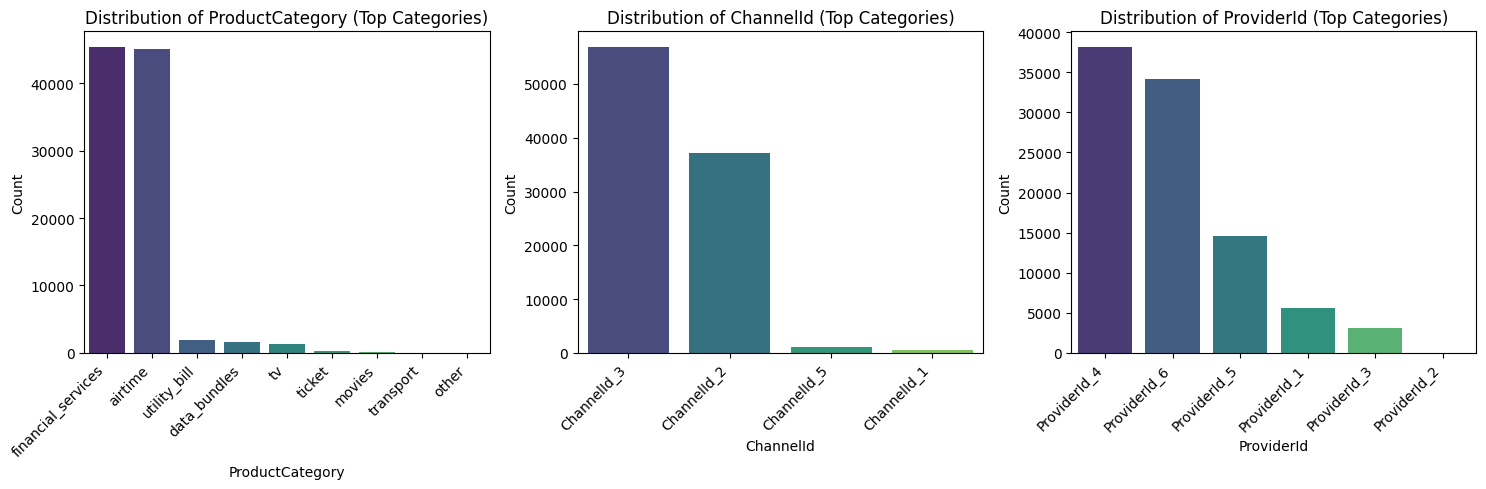


--- Fraud Result Distribution (Target for later analysis) ---
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


In [10]:
# Categorical Feature Distributions
categorical_features = ['ProductCategory', 'ChannelId', 'ProviderId']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    # Analyze value counts
    top_categories = df[feature].value_counts().nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
    plt.title(f'Distribution of {feature} (Top Categories)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Check Fraud Rate distribution (The implicit baseline)
print("\n--- Fraud Result Distribution (Target for later analysis) ---")
print(df['FraudResult'].value_counts(normalize=True))

## Key Insights from Exploratory Data Analysis (EDA)

Based on the statistical summaries and visualizations above, here are the top 5 most important insights that will guide our Feature Engineering (Task 3) and Target Engineering (Task 4):

1.  **Extreme Feature Dominance (Categorical Imbalance):** The distribution across key categorical features (`ProductCategory`, `ChannelId`, `ProviderId`) is highly imbalanced, with a few categories dominating the transaction volume.
    * *Action:* We will use **Weight of Evidence (WoE)** transformation (Task 3) to better handle these features and capture their predictive power relative to the target risk proxy.

2.  **Severe Skew and Outliers in `Amount`:** The `Amount` feature is extremely right-skewed, showing significant outliers and a large concentration of values near zero.
    * *Action:* The feature must be **log-transformed and standardized** before use in distance-based algorithms like K-Means clustering (Task 4) and linear models to ensure features are on a comparable scale.

3.  **Presence of Credits and Debits:** The `Amount` column contains both positive and negative values.
    * *Action:* For the **Monetary** component of the RFM analysis (Task 4), we will use the absolute value or carefully consider the direction of the transaction to calculate overall customer spending.

4.  **No Missing Data:** The initial `df.info()` confirmed zero null values across all columns.
    * *Action:* This simplifies the data processing pipeline significantly, as complex imputation is not required for the raw data.

5.  **Need for Time Feature Extraction:** The `TransactionStartTime` provides second-level granularity over a period.
    * *Action:* This feature is critical for calculating **Recency** (time since last transaction) for the RFM model and for extracting temporal features (hour, day, month) for the predictive model.